/tmp/ipython-input-4067617342.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grades["S1"] = grades["G1"].apply(grade_to_state)
/tmp/ipython-input-4067617342.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grades["S2"] = grades["G2"].apply(grade_to_state)
/tmp/ipython-input-4067617342.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

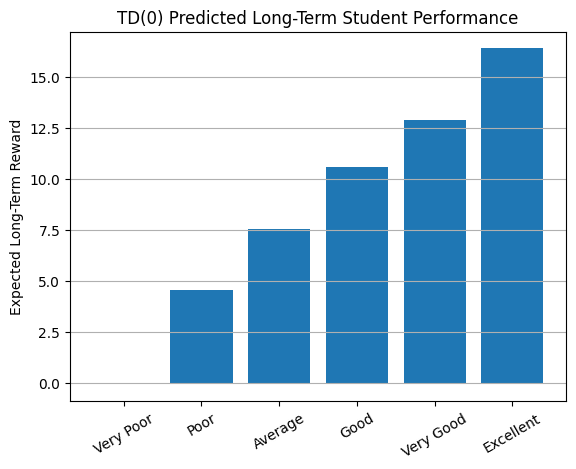

Learned Value Function V(s):
State 0 (Very Poor): -0.08
State 1 (Poor): 4.53
State 2 (Average): 7.55
State 3 (Good): 10.56
State 4 (Very Good): 12.87
State 5 (Excellent): 16.40


In [3]:
# ============================================================
# Programming Assignment 29
# Temporal Difference Learning using REAL DATASET
# Dataset: UCI Student Performance Dataset
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) LOAD REAL DATASET
# -----------------------------
# Download student-mat.csv from UCI repository before running
df = pd.read_csv("student-mat.csv", sep=";")

# We use G1 (term1), G2 (term2), G3 (final)
grades = df[["G1", "G2", "G3"]]

# -----------------------------
# 2) DISCRETIZE GRADES → STATES
# -----------------------------
def grade_to_state(g):
    if g <= 5: return 0
    elif g <= 9: return 1
    elif g <= 12: return 2
    elif g <= 15: return 3
    elif g <= 18: return 4
    else: return 5

grades["S1"] = grades["G1"].apply(grade_to_state)
grades["S2"] = grades["G2"].apply(grade_to_state)
grades["S3"] = grades["G3"].apply(grade_to_state)

# -----------------------------
# 3) DEFINE MRP TRAJECTORIES
# -----------------------------
# Each student = one episode
episodes = []
for _, row in grades.iterrows():
    states = [row["S1"], row["S2"], row["S3"]]
    rewards = [row["G2"] - row["G1"], row["G3"] - row["G2"], row["G3"]]
    episodes.append((states, rewards))

# -----------------------------
# 4) TD(0) LEARNING
# -----------------------------
S = 6
gamma = 0.9
alpha = 0.1
V = np.zeros(S)

def td0_update(states, rewards):
    global V
    for t in range(len(states)-1):
        s, s_next = states[t], states[t+1]
        r = rewards[t]
        V[s] += alpha * (r + gamma * V[s_next] - V[s])
    # terminal update
    V[states[-1]] += alpha * (rewards[-1] - V[states[-1]])

# Training
for _ in range(50):  # multiple passes over dataset
    for states, rewards in episodes:
        td0_update(states, rewards)

# -----------------------------
# 5) VISUALIZATION
# -----------------------------
state_labels = [
    "Very Poor", "Poor", "Average",
    "Good", "Very Good", "Excellent"
]

plt.figure()
plt.bar(state_labels, V)
plt.title("TD(0) Predicted Long-Term Student Performance")
plt.ylabel("Expected Long-Term Reward")
plt.xticks(rotation=30)
plt.grid(axis="y")
plt.show()

# -----------------------------
# 6) OUTPUT
# -----------------------------
print("Learned Value Function V(s):")
for i, v in enumerate(V):
    print(f"State {i} ({state_labels[i]}): {v:.2f}")
